MOHAMMED IFTEKHAR ||
20-41980-1 ||
Computer Vision and Pattern Recognization (Sec-B)

In [17]:
import os
import cv2
import random
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

Loading CIFAR10 Dataset

In [18]:
TRAIN_DIR = "C:/PROGRAMMING/CVPR/CIFAR10/train"
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [19]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img))
        TRAIN_DATA.append({'image': img_arr, 'class': class_num})
print(len(TRAIN_DATA))

100%|██████████| 5000/5000 [00:00<00:00, 6046.52it/s]

50000


Overview of random images from the dataset

KeyError: 0

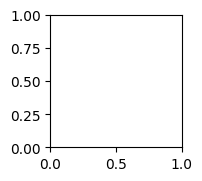

In [20]:
random.shuffle(TRAIN_DATA)
plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(TRAIN_DATA[i][0])
    plt.xlabel(CATEGORIES[TRAIN_DATA[i][1]])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()

In [ ]:
f0 = TRAIN_DATA[0:1000]
f1 = TRAIN_DATA[1000:2000]
f2 = TRAIN_DATA[2000:3000]
f3 = TRAIN_DATA[3000:4000]
f4 = TRAIN_DATA[4000:5000]

=> The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

=> K = number of neighbors
=> X = features
=> Y = targets
=> a = prediction

In [22]:
class KNN:
    k = None

    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def accuracy(self, y_actual, y_pred):
        return np.sum(y_actual == y_pred) / len(y_actual)
    
    def predict(self, X_test, l_func = "l2"):
        y_predtion = [] 
        i = 0
        for x in tqdm(X_test):
            distances = []
            for i in range(len(self.X)):
                if l_func == "l2":
                    distance = np.sqrt(np.sum((x - self.X[i])**2))
                    distances.append({
                        'distance': distance,
                        'class': self.y[i]
                    })
                elif l_func == "l1":
                    distance = np.sum(np.abs(x - self.X[i]))
                    distances.append({
                        'distance': distance,
                        'class': self.y[i]
                    })
            distances.sort(key=lambda x: x['distance'])
            k_nearest = distances[:self.k]
            k_nearest_classes = [x['class'] for x in k_nearest]
            y_predtion.append(max(set(k_nearest_classes), key=k_nearest_classes.count))
        return y_predtion

In [23]:
def split(X, y, test_size=0.2):
    X_train = X[:int(len(X)*(1-test_size))]
    X_test = X[int(len(X)*(1-test_size)):]
    y_train = y[:int(len(y)*(1-test_size))]
    y_test = y[int(len(y)*(1-test_size)):]
    return X_train, X_test, y_train, y_test

X = np.array([i['image'] for i in TRAIN_DATA[:5000]])
y = np.array([i['class'] for i in TRAIN_DATA[:5000]])

l1_accuracies = {}
l2_accuracies = {}

k_neighbors = np.arange(1, 20)

for k in tqdm(k_neighbors):
    knn = KNN(k)
    
    X_train , X_test, y_train, y_test = split(X, y, test_size=0.2)

    knn.fit(X_train, y_train)

    y_pred_l1 = knn.predict(X_test, l_func="l1")
    y_pred_l2 = knn.predict(X_test, l_func="l2")

   
    l1_accuracies[k] = knn.accuracy(y_test, y_pred_l1)
    l2_accuracies[k] = knn.accuracy(y_test, y_pred_l2)

    print(f"for k = {k} l1 accuracy is {l1_accuracies[k]} and l2 accuracy is {l2_accuracies[k]}")


  5%|▌         | 1/19 [02:59<53:55, 179.76s/it]

for k = 1 l1 accuracy is 0.217 and l2 accuracy is 0.199


 11%|█         | 2/19 [06:26<55:29, 195.85s/it]

for k = 2 l1 accuracy is 0.212 and l2 accuracy is 0.181


 16%|█▌        | 3/19 [09:45<52:36, 197.27s/it]

for k = 3 l1 accuracy is 0.217 and l2 accuracy is 0.19


 21%|██        | 4/19 [13:05<49:30, 198.03s/it]

for k = 4 l1 accuracy is 0.222 and l2 accuracy is 0.182


 26%|██▋       | 5/19 [16:17<45:42, 195.87s/it]

for k = 5 l1 accuracy is 0.211 and l2 accuracy is 0.203


 32%|███▏      | 6/19 [19:41<43:05, 198.92s/it]

for k = 6 l1 accuracy is 0.221 and l2 accuracy is 0.21


 37%|███▋      | 7/19 [23:22<41:12, 206.06s/it]

for k = 7 l1 accuracy is 0.218 and l2 accuracy is 0.21


 42%|████▏     | 8/19 [27:03<38:37, 210.69s/it]

for k = 8 l1 accuracy is 0.216 and l2 accuracy is 0.206


 47%|████▋     | 9/19 [30:32<35:01, 210.12s/it]

for k = 9 l1 accuracy is 0.224 and l2 accuracy is 0.199


 53%|█████▎    | 10/19 [34:02<31:30, 210.07s/it]

for k = 10 l1 accuracy is 0.224 and l2 accuracy is 0.206


 58%|█████▊    | 11/19 [38:14<29:44, 223.09s/it]

for k = 11 l1 accuracy is 0.21 and l2 accuracy is 0.186


 63%|██████▎   | 12/19 [41:49<25:43, 220.46s/it]

for k = 12 l1 accuracy is 0.215 and l2 accuracy is 0.201


 68%|██████▊   | 13/19 [45:32<22:08, 221.43s/it]

for k = 13 l1 accuracy is 0.211 and l2 accuracy is 0.193


 74%|███████▎  | 14/19 [49:02<18:09, 217.80s/it]

for k = 14 l1 accuracy is 0.216 and l2 accuracy is 0.199


 79%|███████▉  | 15/19 [52:27<14:16, 214.06s/it]

for k = 15 l1 accuracy is 0.213 and l2 accuracy is 0.204


 84%|████████▍ | 16/19 [55:46<10:28, 209.51s/it]

for k = 16 l1 accuracy is 0.214 and l2 accuracy is 0.206


 89%|████████▉ | 17/19 [59:11<06:56, 208.26s/it]

for k = 17 l1 accuracy is 0.21 and l2 accuracy is 0.197


 95%|█████████▍| 18/19 [1:02:44<03:29, 209.53s/it]

for k = 18 l1 accuracy is 0.213 and l2 accuracy is 0.194


 95%|█████████▍| 18/19 [1:03:23<03:31, 211.28s/it]


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(20,10))
plt.title("KNN Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.plot(k_neighbors, list(l1_accuracies.values()), label="L1 Distance", color="red")
plt.plot(k_neighbors, list(l2_accuracies.values()), label="L2 Distance", color="blue")
plt.xticks(k_neighbors)
plt.legend([
    "L1 Distance",
    "L2 Distance"
], loc="lower left", fontsize=12)
plt.show()

In [ ]:
def best_accuracy(accuracies):
    best_k = max(accuracies, key=accuracies.get)
    best_accuracy = accuracies[best_k]
    return best_k, best_accuracy

best_k_l1, best_accuracy_l1 = best_accuracy(l1_accuracies)
best_k_l2, best_accuracy_l2 = best_accuracy(l2_accuracies)

print(f"Best K for L1 Distance is {best_k_l1} with accuracy {best_accuracy_l1}")